In [18]:
!pip install underthesea
import urllib.request
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
import pandas as pd
from underthesea import word_tokenize
import numpy as np



In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Load data from crawler file
df = pd.read_csv("/content/drive/MyDrive/btth3/data - data.csv")
df.head()

comment label  rate Unnamed: 3
0               √Åo bao ƒë·∫πp ·∫°!!   POS     5        NaN
1                  Tuy·ªát v·ªùi !   POS     5        NaN
2   2day ao khong giong trong.   NEG     1        NaN
3  M√πi th∆°m,b√¥i l√™n da m·ªÅm da.   POS     5        NaN
4            V·∫£i ƒë·∫πp, d√†y d·∫∑n.   POS     5        NaN

In [21]:
tweet_df = df[['comment','label']]
tweet_df = tweet_df[tweet_df['label'] != 'NEU']
print(tweet_df.shape)
tweet_df

(26762, 2)


comment label
0                                         √Åo bao ƒë·∫πp ·∫°!!   POS
1                                            Tuy·ªát v·ªùi !   POS
2                             2day ao khong giong trong.   NEG
3                            M√πi th∆°m,b√¥i l√™n da m·ªÅm da.   POS
4                                      V·∫£i ƒë·∫πp, d√†y d·∫∑n.   POS
...                                                  ...   ...
31455                                   Kh√¥ng ƒë√°ng ti·ªÅn.   NEG
31456                                      Qu·∫ßn r·∫•t ƒë·∫πp.   POS
31457                            H√†ng ƒë·∫πp ƒë√∫ng gi√° ti·ªÅn.   POS
31458                                   Ch·∫•t v·∫£i kh√° ·ªïn.   POS
31459  √°o r·∫•t ok nh√© , v·∫£i m·ªãn , len cao c·ªï n√†y ph·ªëi ...   POS

[26762 rows x 2 columns]

In [22]:
yt = tweet_df['label']
yt

0        POS
1        POS
2        NEG
3        POS
4        POS
        ... 
31455    NEG
31456    POS
31457    POS
31458    POS
31459    POS
Name: label, Length: 26762, dtype: object

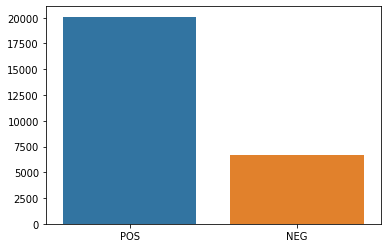

In [23]:
import seaborn as sns
dd = pd.Series(yt).value_counts()
sns.barplot(x=np.array(['POS','NEG']),y=dd.values)
plt.show()

In [ ]:
dd

POS    20093
NEG     6669
NEU     4698
Name: label, dtype: int64

In [ ]:
yt.shape

(26762,)

In [24]:
sentiment_label = tweet_df.label.factorize()
sentiment_label

(array([0, 0, 1, ..., 0, 0, 0]), Index(['POS', 'NEG'], dtype='object'))

In [25]:
def standardize_data(row):
    # X√≥a d·∫•u ch·∫•m, ph·∫©y, h·ªèi ·ªü cu·ªëi c√¢u
    row = re.sub(r"[\.,\?]+$-", "", row)
    # X√≥a t·∫•t c·∫£ d·∫•u ch·∫•m, ph·∫©y, ch·∫•m ph·∫©y, ch·∫•m thang, ... trong c√¢u
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("‚Äú", " ") \
        .replace(":", " ").replace("‚Äù", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")
    row = row.strip()
    return row

In [26]:
dt = tweet_df.comment.apply(standardize_data)
dt.head()

0                  √Åo bao ƒë·∫πp ·∫°
1                     Tuy·ªát v·ªùi
2     2day ao khong giong trong
3    M√πi th∆°m b√¥i l√™n da m·ªÅm da
4              V·∫£i ƒë·∫πp  d√†y d·∫∑n
Name: comment, dtype: object

In [27]:
tweet = dt.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
print(tokenizer.word_index)

{'r·∫•t': 1, 's·∫£n': 2, 'ph·∫©m': 3, 'ƒë·∫πp': 4, 'ch·∫•t': 5, 'shop': 6, 'h√†ng': 7, 'l∆∞·ª£ng': 8, 'giao': 9, 'tuy·ªát': 10, 'v·ªùi': 11, 'v√†': 12, '√°o': 13, 'g√≥i': 14, 'ƒë√≥ng': 15, 't·ªët': 16, 'nhanh': 17, 'ti·ªÅn': 18, 'ch·∫Øc': 19, 'ch·∫Øn': 20, 'ƒë√°ng': 21, 'v·ª•': 22, 'ph·ª•c': 23, 'gian': 24, 'th·ªùi': 25, 'v·∫£i': 26, 'nh∆∞ng': 27, 'h√¨nh': 28, 'mua': 29, 'l·∫Øm': 30, 'm·∫∑c': 31, 'h∆°i': 32, 'm√¨nh': 33, 'm√†u': 34, 'ko': 35, 'gi√°': 36, 'c√≥': 37, 'k': 38, 'nh∆∞': 39, 'ok': 40, 'qu√°': 41, 'kh√¥ng': 42, 'm√†': 43, 'th√¨': 44, 'l√†': 45, 'v·ªõi': 46, 'ƒë∆∞·ª£c': 47, 'cho': 48, 's·∫Ω': 49, 'h·ªô': 50, 'lu√¥n': 51, '·ªßng': 52, 'b·ªã': 53, '·∫°': 54, 'l·∫°i': 55, 'n√™n': 56, '∆∞ng': 57, 't√¨nh': 58, 'gi·ªëng': 59, 'qu·∫ßn': 60, 'nhi·ªát': 61, '1': 62, 'c≈©ng': 63, 'h∆°n': 64, 'size': 65, 'd√†i': 66, 'k√©m': 67, 'm·ªèng': 68, 'l·∫ßn': 69, 'n·ªØa': 70, 'v·ª´a': 71, 'c√≤n': 72, 'sp': 73, 'c√°i': 74, 'th√≠ch': 75, 'sao': 76, 'n√†y': 77, 'ƒë·∫∑t': 78, 'r·ªông': 79, '√Ω': 80, 

In [28]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           210112    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 226,763
Trainable params: 226,763
Non-trainable params: 0
________________________________________________

In [ ]:
pip install pydot

In [ ]:
pip install graphviz

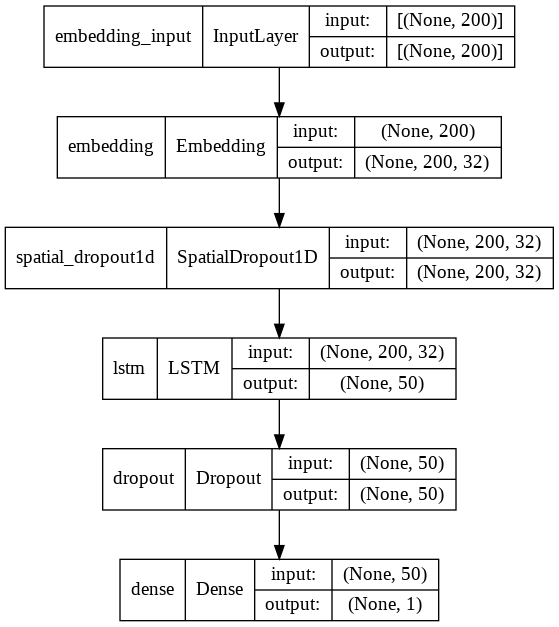

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [16]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
670/670 [==============================] - 151s 221ms/step - loss: 0.3115 - accuracy: 0.8671 - val_loss: 0.2295 - val_accuracy: 0.9103
Epoch 2/5
670/670 [==============================] - 147s 219ms/step - loss: 0.2052 - accuracy: 0.9248 - val_loss: 0.2126 - val_accuracy: 0.9180
Epoch 3/5
670/670 [==============================] - 147s 220ms/step - loss: 0.1815 - accuracy: 0.9350 - val_loss: 0.2069 - val_accuracy: 0.9225
Epoch 4/5
670/670 [==============================] - 147s 219ms/step - loss: 0.1651 - accuracy: 0.9402 - val_loss: 0.2072 - val_accuracy: 0.9208
Epoch 5/5
670/670 [==============================] - 147s 220ms/step - loss: 0.1595 - accuracy: 0.9423 - val_loss: 0.2093 - val_accuracy: 0.9210


In [ ]:
model.save('model.h5')

In [29]:
import tensorflow as tf
model1= tf.keras.models.load_model('model.h5')

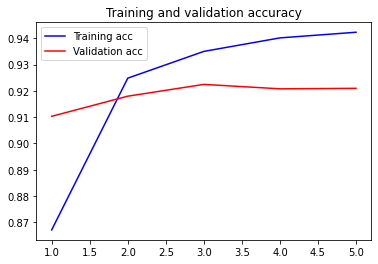

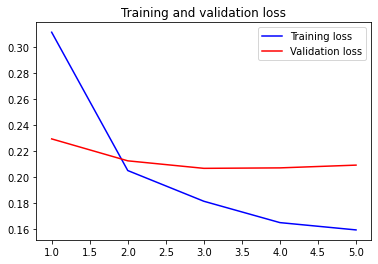

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [32]:
test_sentence1 = input("Nh·∫≠p cmt:")
predict_sentiment(test_sentence1)

Nh·∫≠p cmt:ok nha
Predicted label:  NEG
